NOTE:- To run all the codes properly please run them one by one after uploading the dataset from given link

If the code or visualization does not give desired result that means dataset is altered by the code


In [198]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from tabulate import tabulate

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

## Setting up dataset

*Dataset link*: https://drive.google.com/file/d/16dK1kDcbkpCOPlTAf1tekIgz8lE01m0O/view?usp=sharing

In [199]:
import warnings
warnings.filterwarnings('ignore')

In [200]:
data = pd.read_csv('/content/IMDB-Movie-Data.csv')

# 1. **ALL DATA**




In [201]:
data

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0


# 2. **Filtering Data**
Filtering ata based on the column in asscending/descending order

Available Column for filtering data: 
- Rank
- Title
- Director
- Year
- Runtime (Minutes)
- Rating
- Votes
- Revenue (Millions)
- Metascore
Enter the name of col: Rating
Enter order of filter(asc/desc): desc

Sorted Data (Top 10 rows):
+------+-----------------------+-------------------------+----------------------------------+---------------------------------------------------------------------+------+-------------------+--------+---------+--------------------+-----------+
| Rank |         Title         |          Genre          |             Director             |                               Actors                                | Year | Runtime (Minutes) | Rating |  Votes  | Revenue (Millions) | Metascore |
+------+-----------------------+-------------------------+----------------------------------+---------------------------------------------------------------------+------+-------------------+--------+---------+--------------------+-----------+
|  55  |    The Dark Knight    |  

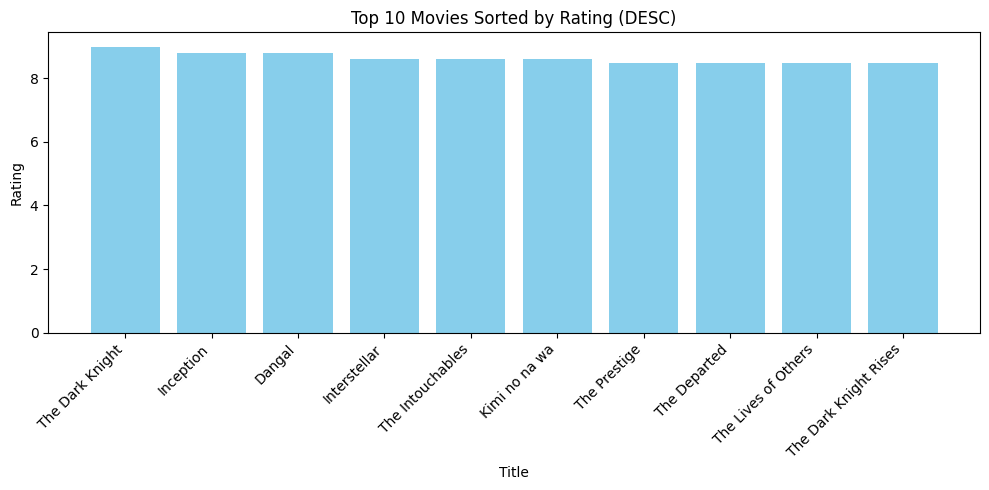

In [202]:
import sys
print("Available Column for filtering data: ")
for cols in data.columns:
  if cols == "Description" or cols == "Genre" or cols == "Actors":
    continue
  print("-", cols)

col_name = input("Enter the name of col: ").title()
if col_name not in data.columns or col_name in ["Description", "Genre", "Actors"]:
  print("Invalid column name")
  sys.exit()

order = input("Enter order of filter(asc/desc): ")
if order not in ['asc','desc']:
  print("Invalid order")
  sys.exit()

ascending_order = True if order == 'asc' else False
data.sort_values(by=col_name,ascending=ascending_order)
sorted_data = data.sort_values(by=col_name, ascending=ascending_order)

# Display sorted data
sorted_data = sorted_data.drop(columns = ["Description"])
print("\nSorted Data (Top 10 rows):")
print(tabulate(sorted_data.head(10), headers = sorted_data.columns, tablefmt='pretty', showindex=False))
print()

# Simple visualization for numeric columns
if np.issubdtype(data[col_name].dtype, np.number):
    plt.figure(figsize=(10, 5))
    plt.bar(sorted_data["Title"][:10], sorted_data[col_name][:10], color="skyblue")
    plt.xticks(rotation=45, ha="right")
    plt.xlabel("Title")
    plt.ylabel(col_name)
    plt.title(f"Top 10 Movies Sorted by {col_name} ({order.upper()})")
    plt.tight_layout()
    plt.show()
else:
    print(f"The column '{col_name}' is not numeric, skipping plot.")

# 3. **Check Top 10 Rows of the Dataset**

In [203]:
data.head(10)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0
9,10,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0


# 4. **Check Last 10 Rows of The Dataset:**

In [204]:
data.tail(10)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
990,991,Underworld: Rise of the Lycans,"Action,Adventure,Fantasy",An origins story centered on the centuries-old...,Patrick Tatopoulos,"Rhona Mitra, Michael Sheen, Bill Nighy, Steven...",2009,92,6.6,129708,45.80,44.0
991,992,Taare Zameen Par,"Drama,Family,Music",An eight-year-old boy is thought to be a lazy ...,Aamir Khan,"Darsheel Safary, Aamir Khan, Tanay Chheda, Sac...",2007,165,8.5,102697,1.20,42.0
992,993,Take Me Home Tonight,"Comedy,Drama,Romance","Four years after graduation, an awkward high s...",Michael Dowse,"Topher Grace, Anna Faris, Dan Fogler, Teresa P...",2011,97,6.3,45419,6.92,NaN
993,994,Resident Evil: Afterlife,"Action,Adventure,Horror",While still out to destroy the evil Umbrella C...,Paul W.S. Anderson,"Milla Jovovich, Ali Larter, Wentworth Miller,K...",2010,97,5.9,140900,60.13,37.0
994,995,Project X,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012,88,6.7,164088,54.72,48.0
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0
999,1000,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


# 5. **Find Shape of Our Dataset**(Number of Rows And Number of Columns)

In [205]:
data.shape

(1000, 12)

In [206]:
print('Number of Rows',data.shape[0])
print('Number of Columns',data.shape[1])

Number of Rows 1000
Number of Columns 12


# 6. **Getting Information About Our Dataset**
* Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [207]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


# 7. **Check Null Values In The Dataset**

In [208]:
data.isnull().sum()

,0
Rank,0
Title,0
Genre,0
Description,0
Director,0
Actors,0
Year,0
Runtime (Minutes),0
Rating,0
Votes,0


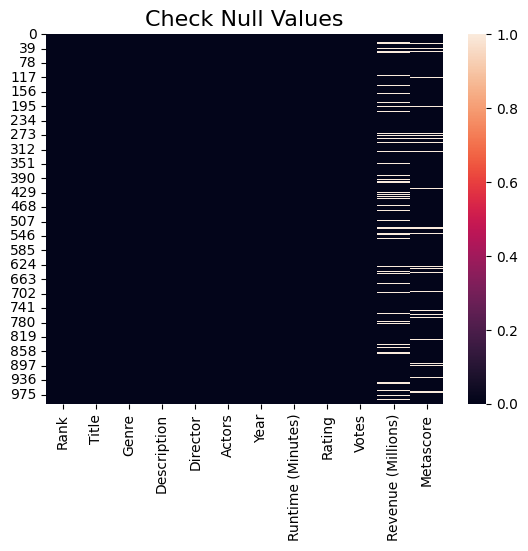

In [209]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(data.isnull())
plt.title("Check Null Values",fontsize=16)
# plt.xticks(rotation=90)
plt.show()

# 8. **Dropping Rows having Atleast One Missing Value**

In [210]:
data = data.dropna()

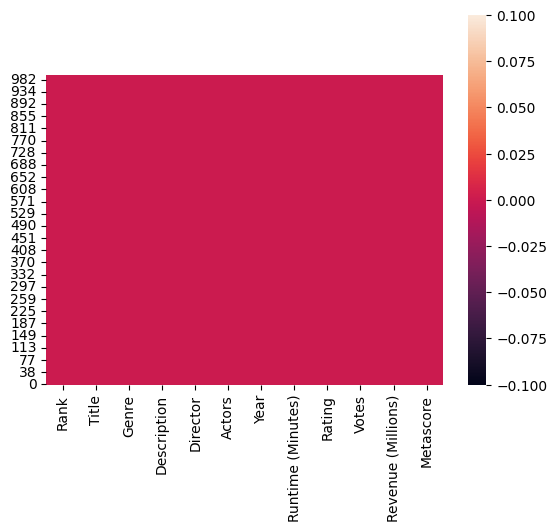

In [211]:
sns.heatmap(data.isnull())
plt.ylim(0,1000)
plt.show()

# 9. **Check For Duplicate Data**

In [212]:
dup_data=data.duplicated().any()
print("Are there any duplicated values in data?\n",dup_data)

Are there any duplicated values in data?
 False


# 10. Get **Overall Statistics** About The DataFrame

In [213]:
data.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,838.000000,838.00000,838.000000,838.000000,8.380000e+02,838.000000,838.000000
mean,485.247017,2012.50716,114.638425,6.814320,1.932303e+05,84.564558,59.575179
std,286.572065,3.17236,18.470922,0.877754,1.930990e+05,104.520227,16.952416
min,1.000000,2006.00000,66.000000,1.900000,1.780000e+02,0.000000,11.000000
25%,238.250000,2010.00000,101.000000,6.300000,6.127650e+04,13.967500,47.000000
50%,475.500000,2013.00000,112.000000,6.900000,1.368795e+05,48.150000,60.000000
75%,729.750000,2015.00000,124.000000,7.500000,2.710830e+05,116.800000,72.000000
max,1000.000000,2016.00000,187.000000,9.000000,1.791916e+06,936.630000,100.000000


# 11. **Correlation Heatmap** → between numerical features

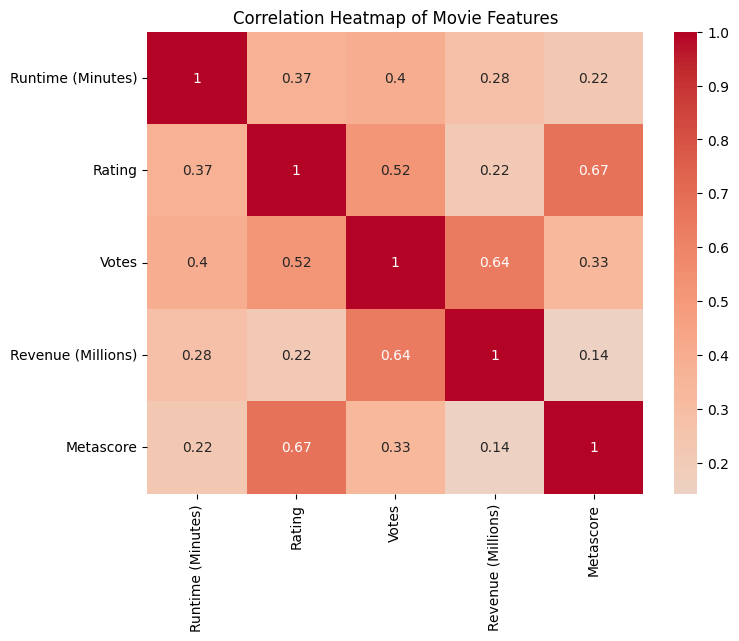

In [214]:
# Select numeric columns
numeric_cols = ['Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)', 'Metascore']

# Correlation matrix
corr = data[numeric_cols].corr()

# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Movie Features")
plt.show()


# 12. In Which Year There Was The **Highest Voting**?

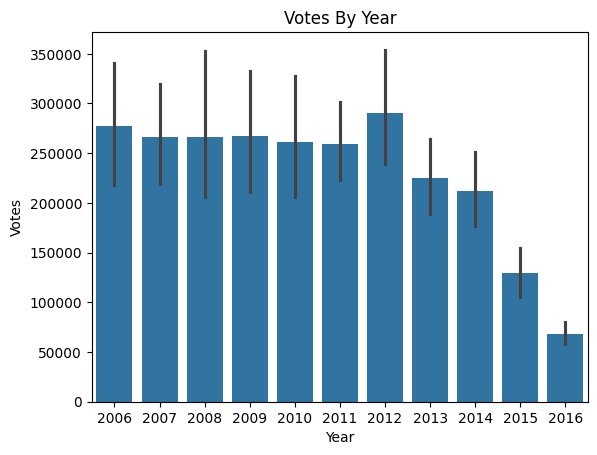

In [215]:
sns.barplot(x='Year',y='Votes',data=data)
plt.title("Votes By Year")
plt.show()

# 13. In Which Year There Was The **Highest Revenue**?

Year
2006     3577.48
2007     4095.26
2008     4681.22
2009     5208.39
2010     5989.65
2011     5341.09
2012     6826.39
2013     7399.11
2014     7945.33
2015     8799.09
2016    11002.09
Name: Revenue (Millions), dtype: float64



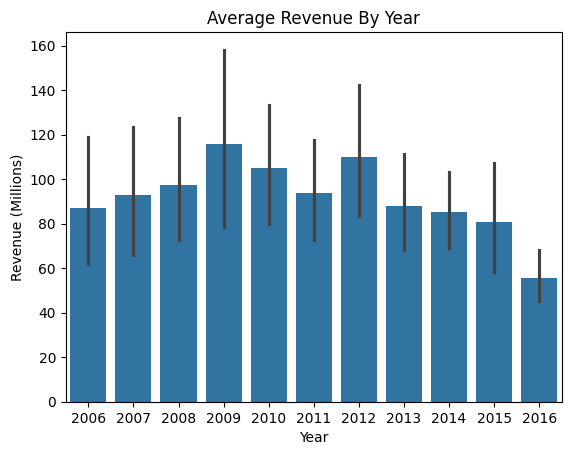

Text(0.5, 1.0, 'Total Revenue By Year')

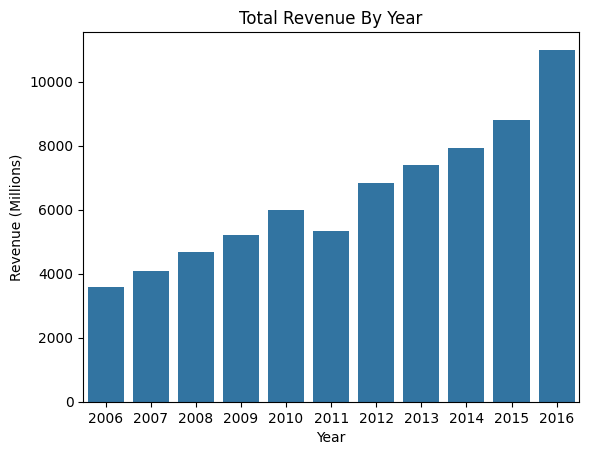

In [216]:
data2=data.groupby('Year')['Revenue (Millions)'].sum()
print(data2)
print()
sns.barplot(x='Year',y='Revenue (Millions)',data=data)
plt.title("Average Revenue By Year")
plt.show()
sns.barplot(data=data2)
plt.title("Total Revenue By Year")

# 14. Find the **Average Rating for Each Director** and Plot top 10 and Bottom 10 in the List

Director
Christopher Nolan       8.680000
Damien Chazelle         8.400000
Rajkumar Hirani         8.300000
Pete Docter             8.250000
Quentin Tarantino       8.166667
                          ...   
Elizabeth Banks         5.400000
Eli Roth                5.266667
Bill Condon             5.200000
Michael Patrick King    4.900000
Rob Cohen               4.900000
Name: Rating, Length: 178, dtype: float64


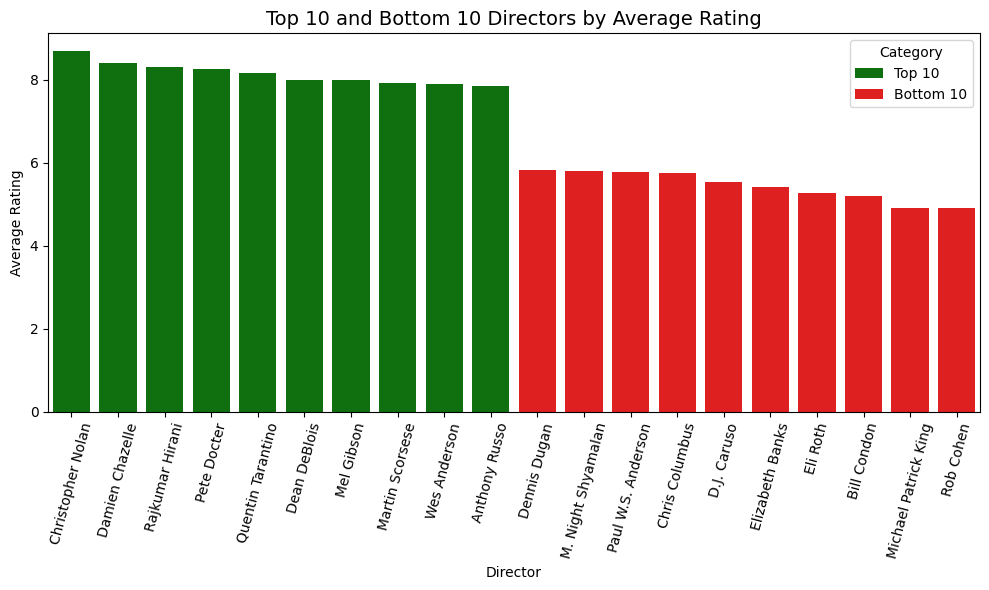

In [217]:
director_avg = (
    data.groupby('Director')
      .filter(lambda x: len(x) >= 2)   # keeps directors with at least 2 movies
      .groupby('Director')['Rating']
      .mean()
      .sort_values(ascending=False)
)
print(director_avg)
top10 = director_avg.head(10).reset_index()
bottom10 = director_avg.tail(10).reset_index()

top10['Category'] = 'Top 10'
bottom10['Category'] = 'Bottom 10'

combined = pd.concat([top10, bottom10])
plt.figure(figsize=(10, 6))
sns.barplot(
    data = combined,
    x = 'Director',
    y = 'Rating',
    hue = 'Category',
    palette= {'Top 10':'green', 'Bottom 10': 'red'}
)
plt.title('Top 10 and Bottom 10 Directors by Average Rating', fontsize=14)
plt.xticks(rotation=75)
plt.ylabel('Average Rating')
plt.xlabel('Director')
plt.tight_layout()
plt.show()

# 15. **Display Number of Movies Per Year**

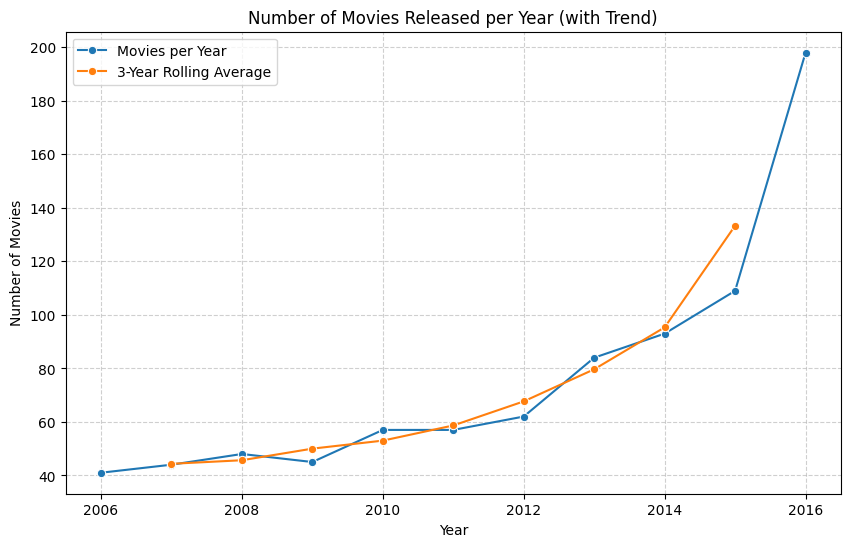

In [218]:
movies_per_year = data['Year'].value_counts().sort_index()

rolling_avg = movies_per_year.rolling(window=3, center=True).mean()

plt.figure(figsize=(10,6))

sns.lineplot(x=movies_per_year.index, y=movies_per_year.values, marker='o', label='Movies per Year')

sns.lineplot(x=rolling_avg.index, y=rolling_avg.values, marker='o', label='3-Year Rolling Average')

plt.title('Number of Movies Released per Year (with Trend)')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


# 16. Find **Most Popular Movie Titles**(Top 15) and **Least Popular Movie Titles**(Bottom 15)

Currently Our dataset have assigned ranks but we don't know on what basis. So let's assign rank however user want to assign it and displaying Top 15 of new dataset.

Also they are ploted in a graph.

In [219]:
data.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [220]:
num_col = data.select_dtypes(include=['float','int']).columns.tolist()
print(f'List of numerical columns to rearange the data: {num_col[1:]}')
col = input("Enter the column name you want to rank by: ").title()
if col not in num_col:
  print("Invalid column name. Chose from the following: ")
  print(num_col)
else:
  order = input("Enter order of filter(asc/desc): ")
  if order not in ['asc','desc']:
    print("Invalid order. By default Descending.")
    ascending_order = False
  else:
    ascending_order = True if order == 'asc' else False
  new_data = data.sort_values(by=col,ascending=ascending_order).reset_index(drop=True)
  new_data['Rank'] = data.index + 1

print("\nTop 15 and Bottom 15:")
# print(new_data[['Title', col, 'Rank']])

top15 = new_data[['Title', col, 'Rank']].head(15).reset_index(drop=True)
bottom15 = new_data[['Title', col, 'Rank']].tail(15).reset_index(drop=True)
print(tabulate(top15, headers='keys', tablefmt='pretty', showindex=False))
print()
print(tabulate(bottom15, headers='keys', tablefmt='pretty', showindex=False))
print()

List of numerical columns to rearange the data: ['Year', 'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)', 'Metascore']
Enter the column name you want to rank by: Votes
Enter order of filter(asc/desc): desc

Top 15 and Bottom 15:
+-------------------------+---------+------+
|          Title          |  Votes  | Rank |
+-------------------------+---------+------+
|     The Dark Knight     | 1791916 |  1   |
|        Inception        | 1583625 |  2   |
|  The Dark Knight Rises  | 1222645 |  3   |
|      Interstellar       | 1047747 |  4   |
|      The Avengers       | 1045588 |  5   |
|    Django Unchained     | 1039115 |  6   |
|  Inglourious Basterds   | 959065  |  7   |
|      The Departed       | 937414  |  9   |
|         Avatar          | 935408  |  10  |
|      The Prestige       | 913152  |  11  |
| The Wolf of Wall Street | 865134  |  12  |
|     Shutter Island      | 855604  |  13  |
| Guardians of the Galaxy | 757074  |  14  |
|        Iron Man         | 737719  | 

## Graph:

plotting graph:



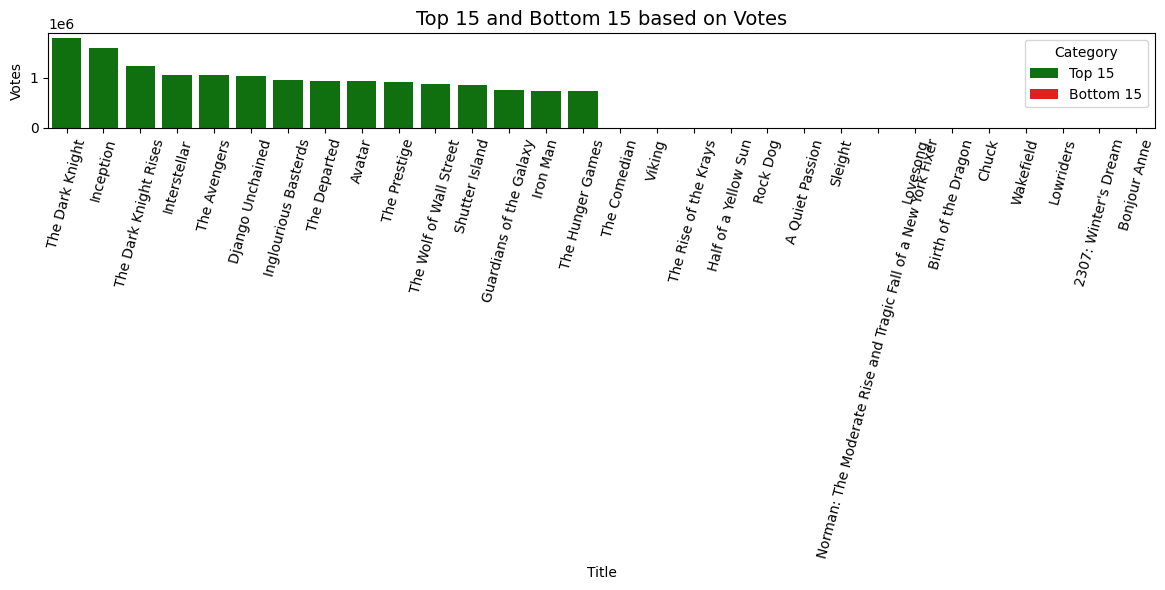

In [221]:
print('plotting graph:\n')
top15['Category'] = 'Top 15'
bottom15['Category'] = 'Bottom 15'
combined = pd.concat([top15, bottom15])

plt.figure(figsize=(12, 6))
sns.barplot(
    data = combined,
    x = 'Title',
    y = col,
    hue = 'Category',
    palette= {'Top 15':'green', 'Bottom 15': 'red'}
)
plt.title(f'Top 15 and Bottom 15 based on {col}', fontsize=14)
plt.xticks(rotation=75)
plt.xlabel('Title')
plt.ylabel(col)
plt.tight_layout()
plt.show()

# 17. Display Top 10 **Highest Rated Movie Titles And its Directors**

In [222]:
top_10_Mov=data.nlargest(10,'Rating')[['Title','Rating','Director']].set_index('Title')

In [223]:
top_10_Mov

,Rating,Director
Title,,
The Dark Knight,9.0,Christopher Nolan
Inception,8.8,Christopher Nolan
Interstellar,8.6,Christopher Nolan
Kimi no na wa,8.6,Makoto Shinkai
The Intouchables,8.6,Olivier Nakache
The Prestige,8.5,Christopher Nolan
The Departed,8.5,Martin Scorsese
The Dark Knight Rises,8.5,Christopher Nolan
Whiplash,8.5,Damien Chazelle


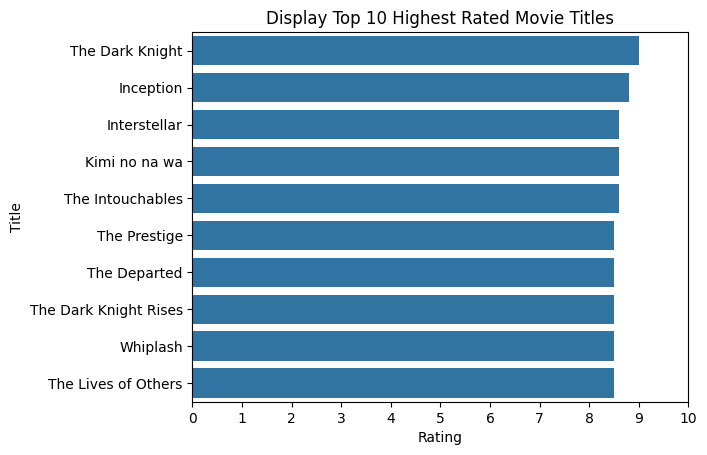

In [224]:
br = sns.barplot(x=top_10_Mov['Rating'],y=top_10_Mov.index)
plt.title("Display Top 10 Highest Rated Movie Titles")
plt.xticks(np.arange(0,11,1))
plt.show()

# 18. **Find Average Rating of Movies Year-wise**

In [225]:
data.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [226]:
year_avg = (
    data.groupby('Year')['Rating']
    .mean()
    .reset_index()
    .sort_values('Year')
)
year_avg.rename(columns={'Rating':'Average Rating'},inplace=True)

In [227]:
year_avg

,Year,Average Rating
0,2006,7.143902
1,2007,7.140909
2,2008,6.708333
3,2009,6.911111
4,2010,6.894737
5,2011,6.945614
6,2012,6.933871
7,2013,6.832143
8,2014,6.822581
9,2015,6.674312


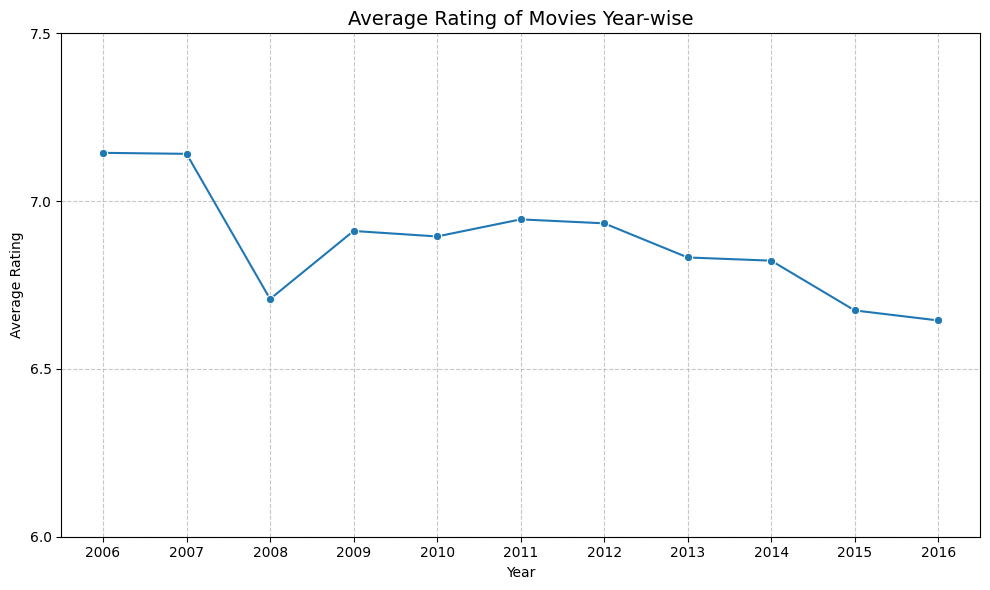

In [228]:
plt.figure(figsize=(10,6))
sns.lineplot(data=year_avg,x='Year',y='Average Rating',marker='o')
plt.title("Average Rating of Movies Year-wise",fontsize = '14')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(ticks=year_avg['Year'])
plt.yticks(ticks = np.arange(6,8,0.5))
plt.tight_layout()
plt.show()


# 19. **Does Rating Affect The Revenue?**

* Scatter points: Each movie.

* Bubble size (optional): Number of votes → bigger = more popular.

* Color: Rating scale.

* Red line: Regression trend → helps see correlation between rating & revenue.

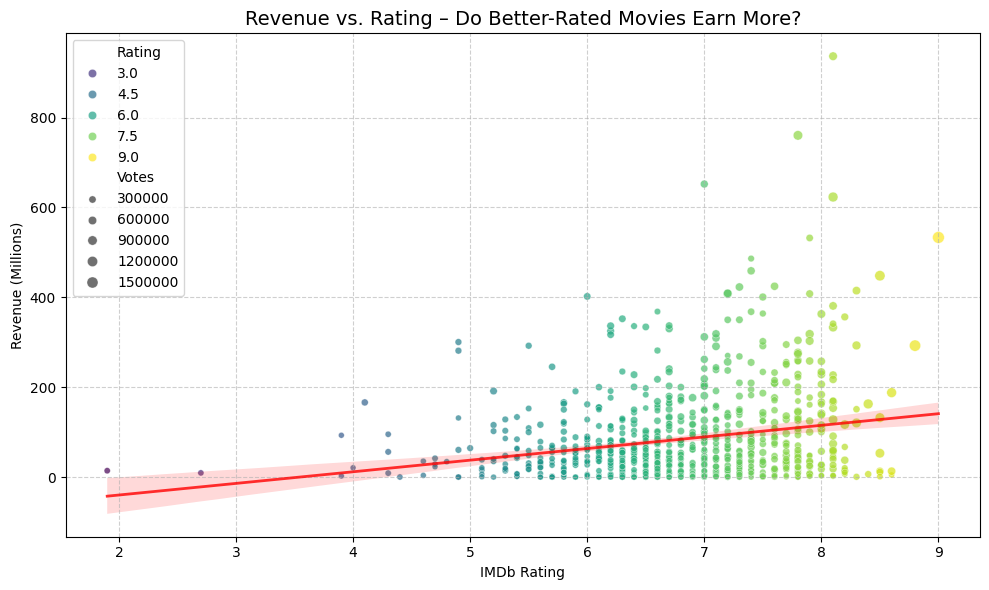

In [229]:
plt.figure(figsize=(10,6))

sns.scatterplot(
    data=data,
    x='Rating',
    y='Revenue (Millions)',
    size = 'Votes',
    hue='Rating',
    alpha=0.7,
    palette='viridis'
)
sns.regplot(
    data=data,
    x='Rating',
    y='Revenue (Millions)',
    scatter=False,
    color='red',
    line_kws={"lw":2, "alpha":0.8}
)

plt.title("Revenue vs. Rating – Do Better-Rated Movies Earn More?", fontsize=14)
plt.xlabel("IMDb Rating")
plt.ylabel("Revenue (Millions)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

### Answer : Yes

# 20. **Rating Categories**
* Convert ratings into bins (e.g., Excellent (≥8), Good (7–7.9), Average (6–6.9), Poor (<6)) and show share of movies.

In [230]:
def rating_category(rating):
    if rating >= 8:
        return "Excellent"
    elif rating >= 7:
        return "Good"
    elif rating >= 6:
        return "Average"
    else:
        return "Poor"

In [231]:
data['Rating Category']=data['Rating'].apply(rating_category)

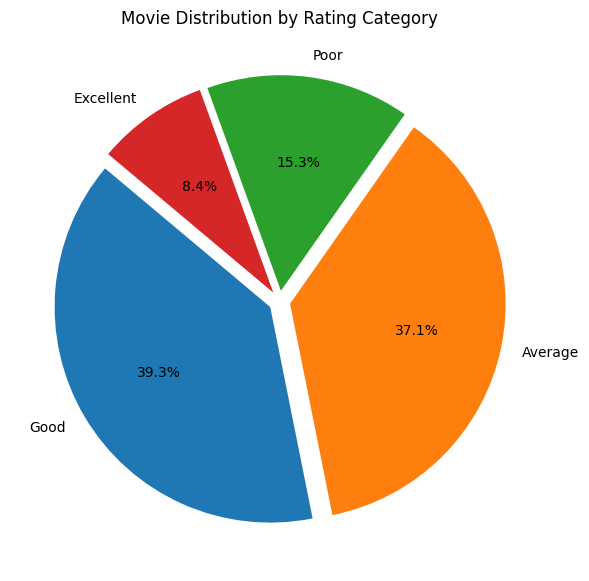

In [232]:
rating_counts = data['Rating Category'].value_counts()

# Pie chart
plt.figure(figsize=(7,7))
plt.pie(
    rating_counts,
    labels=rating_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    explode=[0.05]*len(rating_counts)
)
plt.title('Movie Distribution by Rating Category')
plt.show()

## Table of top 10 in all categories

In [233]:
top_10_exe = data[data['Rating Category'] == 'Excellent'].nlargest(10, 'Rating')[['Title', 'Rating', 'Revenue (Millions)','Rating Category']].reset_index(drop=True)
top_10_good = data[data['Rating Category'] == 'Good'].nlargest(10, 'Rating')[['Title', 'Rating', 'Revenue (Millions)','Rating Category']].reset_index(drop=True)
top_10_avg = data[data['Rating Category'] == 'Average'].nlargest(10, 'Rating')[['Title', 'Rating','Revenue (Millions)', 'Rating Category']].reset_index(drop=True)
top_10_poor = data[data['Rating Category'] == 'Poor'].nlargest(10, 'Rating')[['Title', 'Rating', 'Revenue (Millions)','Rating Category']].reset_index(drop=True)

print("\nTop 10 Excellent Movies:")
print(tabulate(top_10_exe, headers='keys', tablefmt='pretty', showindex=False))

print("\nTop 10 Good Movies:")
print(tabulate(top_10_good, headers='keys', tablefmt='pretty', showindex=False))

print("\nTop 10 Average Movies:")
print(tabulate(top_10_avg, headers='keys', tablefmt='pretty', showindex=False))

print("\nTop 10 Poor Movies:")
print(tabulate(top_10_poor, headers='keys', tablefmt='pretty', showindex=False))


Top 10 Excellent Movies:
+-----------------------+--------+--------------------+-----------------+
|         Title         | Rating | Revenue (Millions) | Rating Category |
+-----------------------+--------+--------------------+-----------------+
|    The Dark Knight    |  9.0   |       533.32       |    Excellent    |
|       Inception       |  8.8   |       292.57       |    Excellent    |
|     Interstellar      |  8.6   |       187.99       |    Excellent    |
|     Kimi no na wa     |  8.6   |        4.68        |    Excellent    |
|   The Intouchables    |  8.6   |       13.18        |    Excellent    |
|     The Prestige      |  8.5   |       53.08        |    Excellent    |
|     The Departed      |  8.5   |       132.37       |    Excellent    |
| The Dark Knight Rises |  8.5   |       448.13       |    Excellent    |
|       Whiplash        |  8.5   |       13.09        |    Excellent    |
|  The Lives of Others  |  8.5   |       11.28        |    Excellent    |
+-----------

# 21. **Year vs. Rating Category Heatmap**

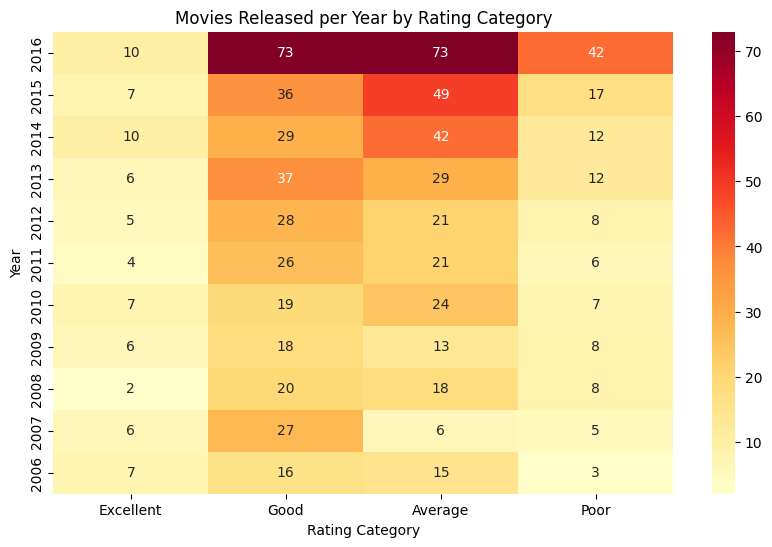

In [234]:
heatmap_data = data.groupby(['Year', 'Rating Category']).size().unstack(fill_value=0)

order = ["Excellent", "Good", "Average", "Poor"]


heatmap_data = heatmap_data[order]

plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlOrRd")
plt.title("Movies Released per Year by Rating Category")
plt.gca().invert_yaxis()

plt.ylabel("Year")
plt.xlabel("Rating Category")
plt.show()

# 22. **Count Number of Movies base on Genre**

In [235]:
list1=[]
for value in data['Genre']:
    list1.append(value.split(','))

In [236]:
data['temp']=list1

In [237]:

gnr = (
    data['Genre']
    .str.split(',')       # split by comma
    .explode()            # split into separate rows
    .str.strip()          # remove extra spaces
    .unique()             # get unique values
    .tolist()             # convert to Python list
)
print("Here's the list of Genres")
print(gnr)
count=0
genre = input("Enter Genre you want to count : ").title().strip()
while True:
  if genre not in gnr:
    print("Enter valid Genre")
    genre = input("Enter Genre you want to count : ").title().strip()
  else:
    break
for value in data['temp']:
  if genre in value:
    count=count+1
print("Total Count is",count)

Here's the list of Genres
['Action', 'Adventure', 'Sci-Fi', 'Mystery', 'Horror', 'Thriller', 'Animation', 'Comedy', 'Family', 'Fantasy', 'Drama', 'Music', 'Biography', 'Romance', 'History', 'Western', 'Crime', 'War', 'Musical', 'Sport']
Enter Genre you want to count : action
Total Count is 277


# 23. **Histogram of Ratings** – Distribution of IMDb ratings.

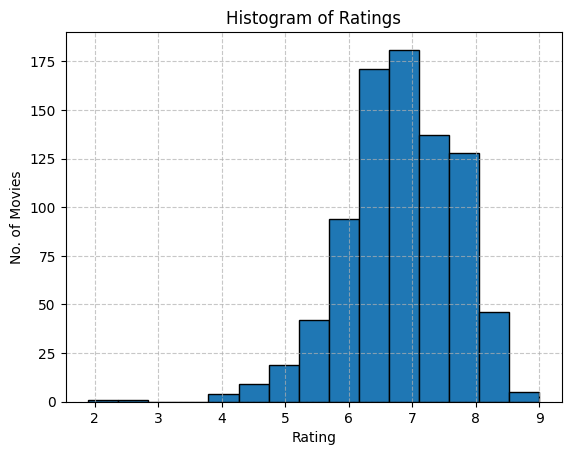

In [238]:
plt.hist(data['Rating'],bins=15, edgecolor = 'black')
plt.title("Histogram of Ratings")
plt.xlabel("Rating")
plt.ylabel("No. of Movies")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# 24. **Votes vs. Rating Scatter Plot** – Do higher-rated movies get more votes?

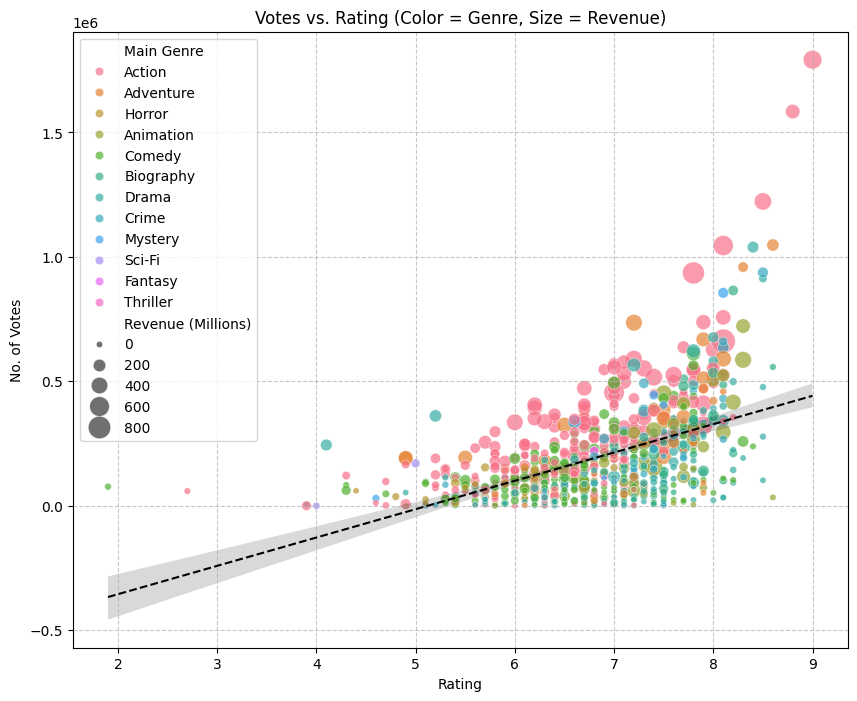

In [239]:
data['Main Genre']=data['Genre'].str.split(',').str[0]

plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=data,
    x='Rating',
    y='Votes',
    hue='Main Genre',
    size = "Revenue (Millions)",
    sizes=(20,300),
    alpha=0.7
)

sns.regplot(
    data=data,
    x='Rating',
    y='Votes',
    scatter=False,
    color='black',
    line_kws={'linewidth': 1.5, 'linestyle': '--'}
)

plt.title('Votes vs. Rating (Color = Genre, Size = Revenue)')
plt.xlabel("Rating")
plt.ylabel("No. of Votes")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# 25. **Runtime vs. Rating** – Do longer movies get better/worse ratings?

* Scatter points: Each movie’s runtime vs. rating.

*  Red line: Regression trend → shows overall tendency.

* If the line slopes up, longer movies tend to get better ratings.

* If it slopes down, longer movies tend to get worse ratings.

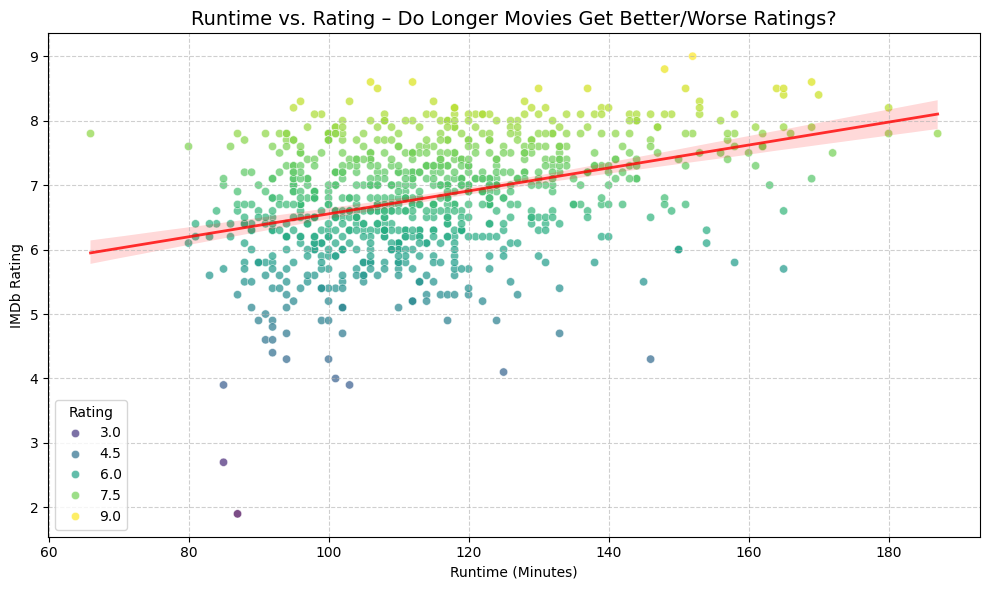

In [240]:
plt.figure(figsize=(10,6))

sns.scatterplot(
    data=data,
    x='Runtime (Minutes)',
    y='Rating',
    hue='Rating',
    alpha=0.7,
    palette='viridis'
)
sns.regplot(
    data=data,
    x='Runtime (Minutes)',
    y='Rating',
    scatter=False,
    color='red',
    line_kws={"lw":2, "alpha":0.8}
)
plt.title("Runtime vs. Rating – Do Longer Movies Get Better/Worse Ratings?", fontsize=14)
plt.xlabel("Runtime (Minutes)")
plt.ylabel("IMDb Rating")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# 26. **Revenue Trends per Year** – Industry earnings trends.

* Top chart: How much the average movie made each year.

* Bottom chart: How much the entire industry made each year.

This way you can spot:

* Whether the industry grew because movies individually earned more

OR
* Because more movies were produced and collectively earned more.

+--------+------------------------+--------------------------+-------------+
|  Year  | Revenue (Millions)_Avg | Revenue (Millions)_Total | Movie Count |
+--------+------------------------+--------------------------+-------------+
| 2006.0 |   87.25560975609756    |         3577.48          |    41.0     |
| 2007.0 |    93.0740909090909    |    4095.2599999999998    |    44.0     |
| 2008.0 |   97.52541666666667    |         4681.22          |    48.0     |
| 2009.0 |        115.742         |         5208.39          |    45.0     |
| 2010.0 |   105.08157894736841   |         5989.65          |    57.0     |
| 2011.0 |   93.70333333333333    |         5341.09          |    57.0     |
| 2012.0 |   110.10306451612904   |         6826.39          |    62.0     |
| 2013.0 |   88.08464285714285    |         7399.11          |    84.0     |
| 2014.0 |    85.4336559139785    |         7945.33          |    93.0     |
| 2015.0 |   80.72559633027524    |         8799.09          |    109.0    |

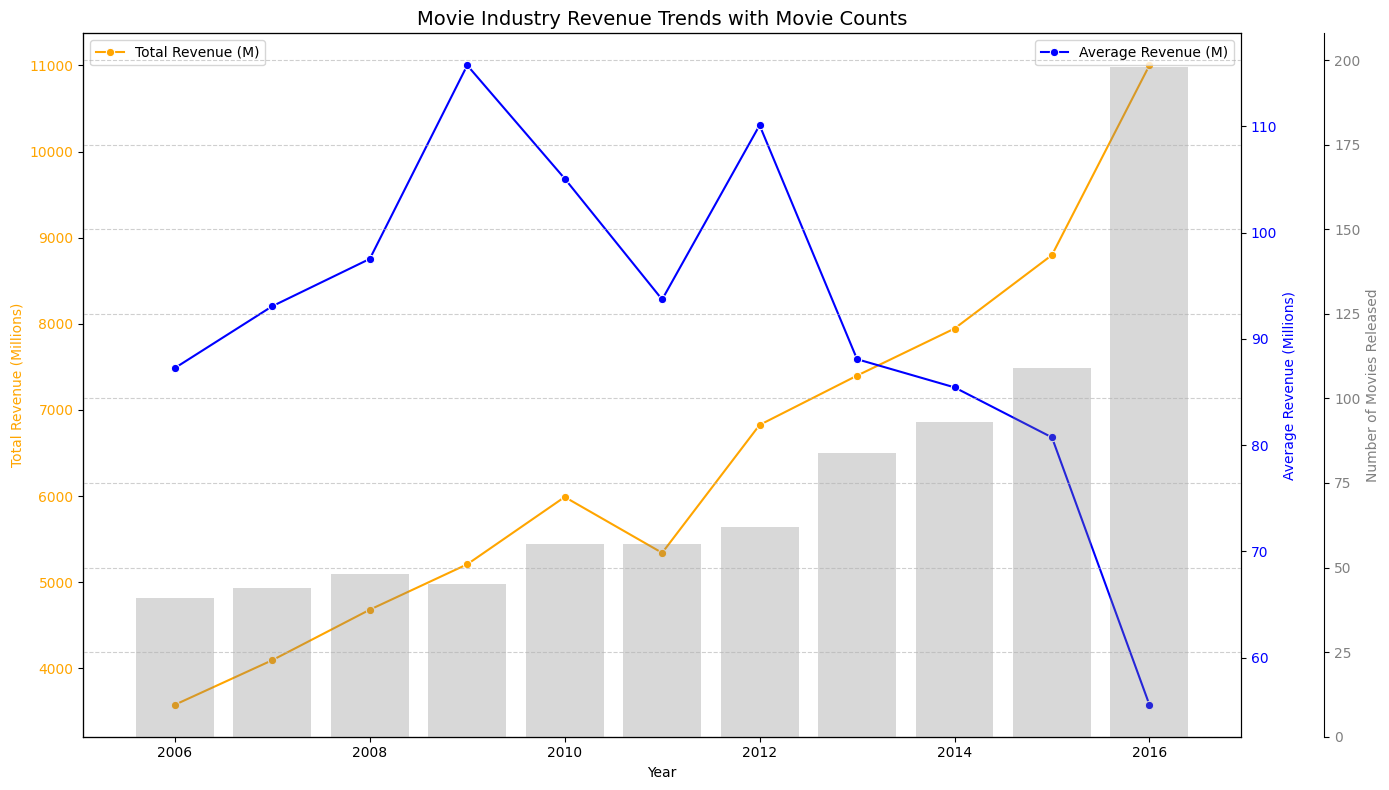

In [241]:
avg_revenue = (
    data.groupby('Year')['Revenue (Millions)']
    .mean()
    .reset_index()
    .sort_values('Year')
)
total_revenue = (
    data.groupby('Year')['Revenue (Millions)']
    .sum()
    .reset_index()
    .sort_values('Year')
)
movie_count = (
    data.groupby('Year')['Title']
    .count()
    .reset_index()
    .rename(columns={'Title':'Movie Count'})
    .sort_values('Year')
)

# Merge all into one DataFrame
rev_summary = avg_revenue.merge(total_revenue, on="Year", suffixes=("_Avg", "_Total"))
rev_summary = rev_summary.merge(movie_count, on="Year")
print(tabulate(rev_summary, headers='keys',tablefmt='pretty',showindex=False))
# Plot
fig, ax1 = plt.subplots(figsize=(14,8))

# --- Total Revenue (Left Axis) ---
sns.lineplot(data=rev_summary, x='Year', y='Revenue (Millions)_Total',
             marker='o', color="orange", ax=ax1, label="Total Revenue (M)")
ax1.set_ylabel("Total Revenue (Millions)", color="orange")
ax1.tick_params(axis='y', labelcolor="orange")

# --- Average Revenue (Right Axis #1) ---
ax2 = ax1.twinx()
sns.lineplot(data=rev_summary, x='Year', y='Revenue (Millions)_Avg',
             marker='o', color="blue", ax=ax2, label="Average Revenue (M)")
ax2.set_ylabel("Average Revenue (Millions)", color="blue")
ax2.tick_params(axis='y', labelcolor="blue")

# --- Movie Count (Right Axis #2, Bars) ---
ax3 = ax1.twinx()
ax3.bar(rev_summary['Year'], rev_summary['Movie Count'], alpha=0.3, color="gray", label="Movie Count")

# Offset the 3rd axis (so labels don't overlap)
ax3.spines["right"].set_position(("outward", 60))
ax3.set_ylabel("Number of Movies Released", color="gray")
ax3.tick_params(axis='y', labelcolor="gray")

# --- Title & Layout ---
plt.title("Movie Industry Revenue Trends with Movie Counts", fontsize=14)
fig.tight_layout()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# 27. **Genre Evolution Chart** – Top 3 Genres per Year

<Figure size 1200x600 with 0 Axes>

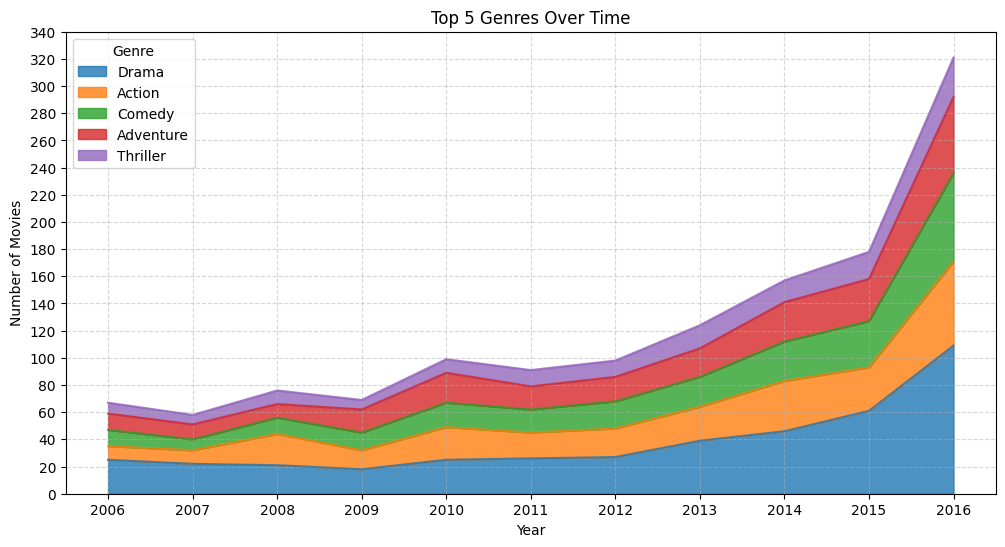

<Figure size 1200x600 with 0 Axes>

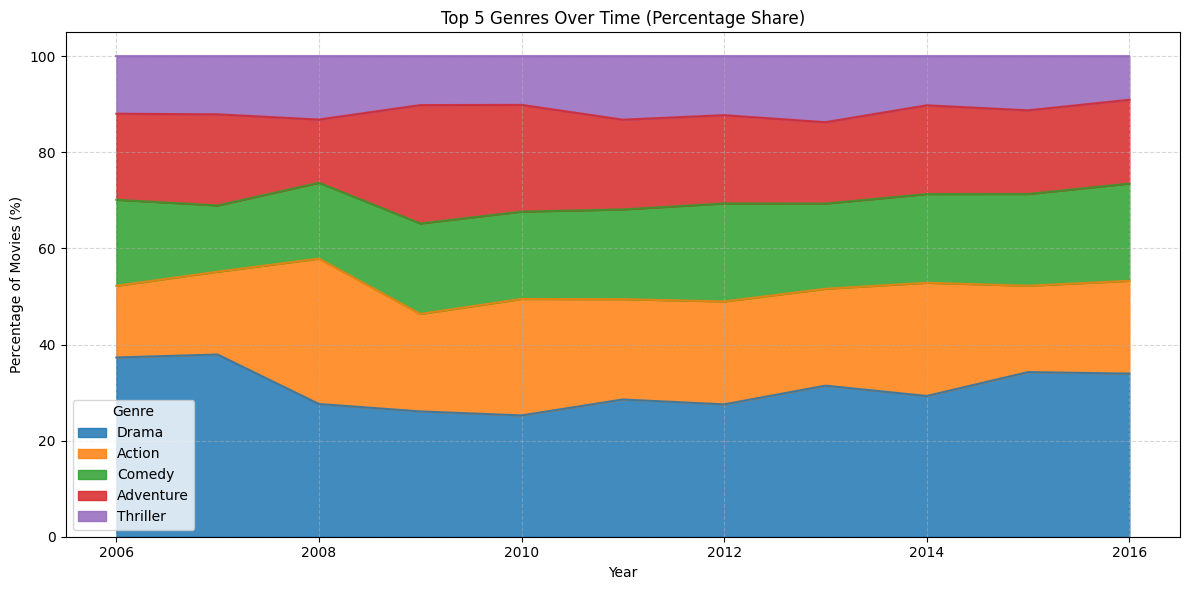

In [242]:
data_genres = data.assign(Genre=data['Genre'].str.split(',')).explode('Genre')

# Count movies per year per genre
genre_year = data_genres.groupby(['Year', 'Genre']).size().unstack(fill_value=0)

# Select top 5 most frequent genres overall
top_genres = data_genres['Genre'].value_counts().head(5).index
genre_year_top = genre_year[top_genres]

plt.figure(figsize=(12,6))

# Stacked area chart
genre_year_top.plot.area(alpha=0.8, figsize=(12,6))
plt.title('Top 5 Genres Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(ticks=np.arange(2006,2017,1))
plt.legend(title='Genre')
plt.yticks(ticks=np.arange(0, 350, 20))
plt.legend(title='Genre')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
print("\n \n")

plt.figure(figsize=(12,6))
# Convert counts to percentages
genre_year_top_pct = genre_year_top.div(genre_year_top.sum(axis=1), axis=0) * 100
# Stacked area chart (percentage share)
genre_year_top_pct.plot.area(alpha=0.85, figsize=(12,6))
plt.title('Top 5 Genres Over Time (Percentage Share)')
plt.xlabel('Year')
plt.ylabel('Percentage of Movies (%)')
plt.legend(title='Genre')
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()